<a href="https://colab.research.google.com/github/megamusfiva/Machine-Learning-/blob/main/Dicoding_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DICODING MACHINE LEARNING ASSIGNMENT**

In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip


--2020-11-06 16:39:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  11.0MB/s    in 43s     

2020-11-06 16:39:50 (7.10 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.3.0'

In [ ]:
#Unzip
import zipfile

local_zip= '/content/rockpaperscissors.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

#local_zip = '/tmp/rps-test-set.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/')
#zip_ref.close()

In [ ]:
#Look list file
!ls /content/
!ls /content/rockpaperscissors/

__MACOSX  rockpaperscissors  rockpaperscissors.zip  sample_data
paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


In [ ]:
#remove 2 file
!rm -rf /content/rockpaperscissors/README_rpc-cv-images.txt
!rm -rf /content/rockpaperscissors/rps-cv-images
!ls /content/rockpaperscissors/

paper  rock  scissors


In [ ]:
rock_dir = os.path.join('/content/rockpaperscissors/rock')
paper_dir = os.path.join('/content/rockpaperscissors/paper')
scissors_dir = os.path.join('/content/rockpaperscissors/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
['IR0TvCNLcK7IrE1a.png', 'Aa9hY8wo2ixaUNKH.png', 'xc9iqz3P8tF5YdCG.png', 'X9KQv42y96rD2TO9.png', 'NQxWkhRHMkt2GrpB.png', 'nNB5f3VARZAaHI4U.png', 'zrrYLvM2uywyFwRy.png', 'FopS2RV432i19UVz.png', 'VkRNUIG8Q54sx8r4.png', 'SNEJ1wGU1s9Dm3I1.png']
['9Dto1OCNf5wjYimE.png', 'BoXJ7o2SeSRRfuAH.png', 'FxLuxwBp9Hw2th2O.png', 'NKNFgMn2Ik3Y9XuX.png', 'pMQfFsmXAu2xZuUv.png', 'IXh9BTFQQ6AIaBpr.png', 'zQvuYPyUR7gXdqXE.png', 'QUcJ1QclQwOY50vY.png', 'bQO2dBIReHsgMCBi.png', 'svY0FVnjij1nSJDK.png']
['Kzghoy329glIgfcC.png', 'lGC1Z9CaHybrKaoK.png', 'Ma48V1PQ0ylc88AU.png', 'ErsQcWAahNPYPZs5.png', 'eU4VT33MEquo64QQ.png', 'UTc5RnTVPMdKnVPL.png', 'R9GlL5dx9nmjXWlS.png', '7Zb3QM9tznboKuQE.png', 'VrHis8ru9xXA5Lqh.png', 'CemUmBPmUpNgXfMC.png']


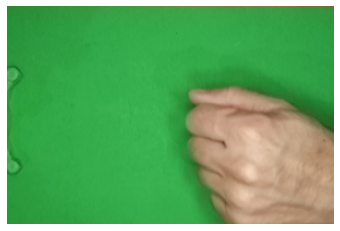

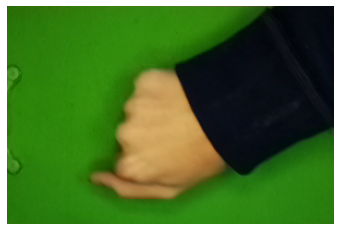

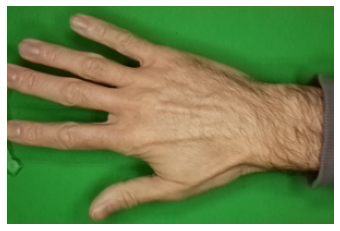

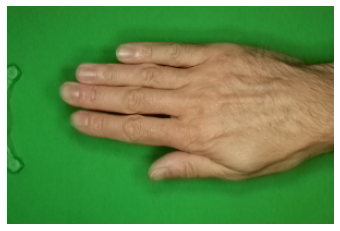

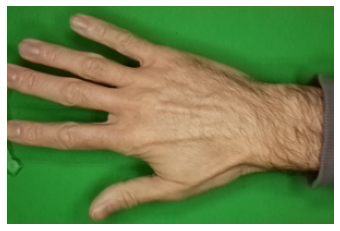

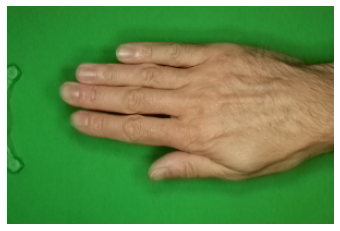

In [ ]:
#Show image
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(paper_dir, fname)
                    for fname in paper_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

image_dir= '/content/rockpaperscissors/'
training_datagen =ImageDataGenerator (
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip= True,
      fill_mode='nearest',
      validation_split=0.2)

train_generator = training_datagen.flow_from_directory(
    image_dir,
    target_size= (100,150),
    class_mode='categorical',
    shuffle=True,
    #batch_size = 126
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    image_dir,
    target_size=(100,150),
    class_mode='categorical',
    #batch_size=126
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
    
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history= model.fit(train_generator,epochs=20, steps_per_epoch=25, validation_data= validation_generator, verbose=1, validation_steps=3)
model.save("rps.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        1

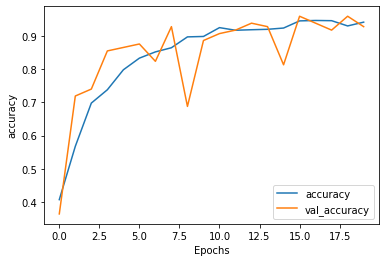

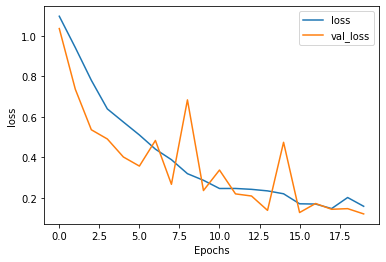

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Saving Rock-paper-scissors_(rock).png to Rock-paper-scissors_(rock).png
Rock-paper-scissors_(rock).png
paper


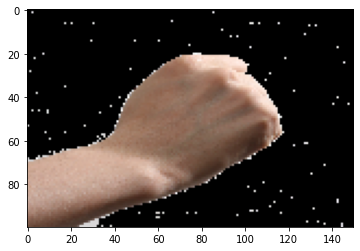

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path=fn
  img=image.load_img(path,target_size=(100,150))
  imgplot = plt.imshow(img)
  x= image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown') 